#+TITLE: Activation Functions
#+CATEGORIES: architecture
#+DESCRIPTION: Activation functions play a crucial role in determining the output of neurons in neural networks. They introduce non-linearity into the network, enabling it to model complex relationships between inputs and outputs.
#+DATE: 2023-12-13
#+HERO: /static/space-bg.png

# Overview

Neural networks are composed of many connected neurons organized into hierarchical layers. The connections between neurons have a weight $w_i$ associated with them that changes through learning. The output of a neuron is computed by taking the weighted sum of all the inputs $x_i$ and a bias term $b$ feeding into the neuron and passing it through a non-linear activation function $\sigma$.

$$
y = \sigma (\sum_{i} {w_i x_i} + b)
$$

The activation function plays a very important role in neural networks. Injecting non-linearity through these activation functions enables the ability for a network to model complex relationships.

Many activation functions have been used over the years with the most popular in early neural network research being sigmoids like the logistic function or the hyperbolic tangent.

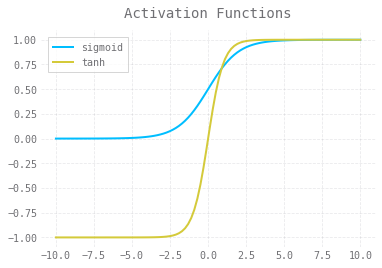

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

plt.style.use('./deadneuron.mplstyle')

x = torch.linspace(-10, 10, 100)

plt.title('Activation Functions')
plt.plot(x, torch.sigmoid(x), label="sigmoid")
plt.plot(x, torch.tanh(x), label="tanh")
plt.legend()
plt.show()

And we can plot the derivatives using torch's autograd.

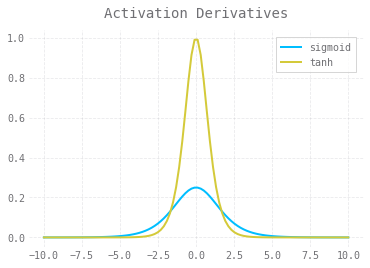

In [2]:
def plot_derivative(x, func):
    f = func(x)
    out = f.sum()
    
    out.backward()
    
    plt.plot(x.detach(), x.grad.detach(), label=f"{func.__name__}")
    plt.legend()
    
    x.grad.zero_()

x = torch.linspace(-10, 10, 100, requires_grad=True)    

plt.title('Activation Derivatives')
plot_derivative(x, torch.sigmoid)
plot_derivative(x, torch.tanh)
plt.show()

Sigmoidal functions are great for shallow networks, however they tend to suffer from the vanishing gradient problem with deeper networks. 

Modern deep learning models mostly use rectifiers which have an unbounded and (mostly) constant positive range.

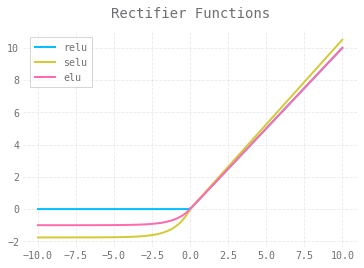

In [3]:
with torch.no_grad():
    plt.title('Rectifier Functions')
    plt.plot(x, torch.relu(x), label="relu")
    plt.plot(x, F.selu(x), label="selu")
    plt.plot(x, F.elu(x), label="elu")
    plt.legend()
    plt.show()

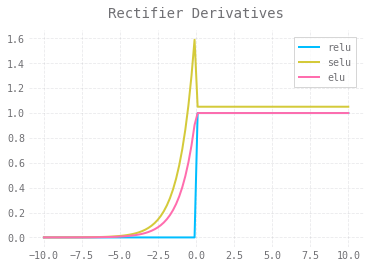

In [4]:
plt.title('Rectifier Derivatives')
plot_derivative(x, torch.relu)
plot_derivative(x, F.selu)
plot_derivative(x, F.elu)
plt.legend()
plt.show()